# Classification on MNIST

In [2]:

#Importing needed libraries

import numpy as np
import matplotlib.pyplot as plt
import setuptools.dist
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

2025-03-19 15:52:53.082003: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 15:52:55.528290: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 15:52:56.691355: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742395977.978466    6141 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742395978.334072    6141 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-19 15:53:01.640763: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# Prepping Data

In [ ]:

#Loading
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


#normalizing mnist data
train_images = train_images.reshape((60000, 28*28)) / 255
test_images = test_images.reshape((10000, 28*28)) / 255

# Splitting off calibration data from training data
calibration_size = 10000  # Number of samples for calibration
calibration_images = train_images[:calibration_size]
calibration_labels = train_labels[:calibration_size]

# Updating training data to exclude calibration samples
train_images = train_images[calibration_size:]
train_labels = train_labels[calibration_size:]

#print(len(train_images))
#print(len(test_images))



(28, 28)


# Neural network intialization

In [4]:

model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(784,)))

# first hidden layer of 128 neurons (one for each class) with activation function softmax
model.add(layers.Dense(128, activation='relu'))

# second hidden layer of 64 neurons (one for each class) with activation function softmax
model.add(layers.Dense(64, activation='relu'))

# output layer of 10 neurons (one for each class) with activation function softmax
model.add(layers.Dense(10, activation='softmax'))


#model description
model.summary()

2025-03-19 15:53:38.223995: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Model training

In [18]:
#compiling model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#training model
batch_size=64
model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(test_images, test_labels))


#saving the model
model.save('mnist_classification_model.h5')


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9981 - loss: 0.0056 - val_accuracy: 0.9774 - val_loss: 0.1463
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9991 - loss: 0.0027 - val_accuracy: 0.9771 - val_loss: 0.1439
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9981 - loss: 0.0071 - val_accuracy: 0.9771 - val_loss: 0.1419
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 0.9768 - val_loss: 0.1495
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9983 - loss: 0.0055 - val_accuracy: 0.9751 - val_loss: 0.1719
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9979 - loss: 0.0065 - val_accuracy: 0.9796 - val_loss: 0.1452
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9750 - val_loss: 0.1721
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9984 - loss: 0.0043 - val_accuracy: 0.

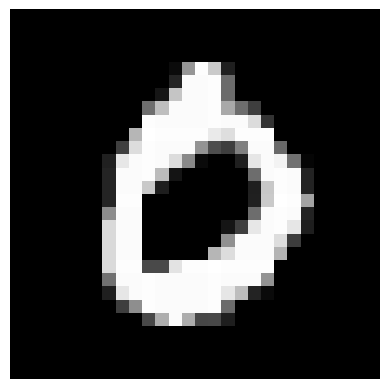

In [19]:
#show image function
def show_image(test_image_index):
    corr_image = test_images[test_image_index].reshape(28,28) 
    plt.imshow(corr_image, cmap='gray')
    plt.axis('off')
    plt.show()

#testing show image function
show_image(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
model prediction: 0
real image:


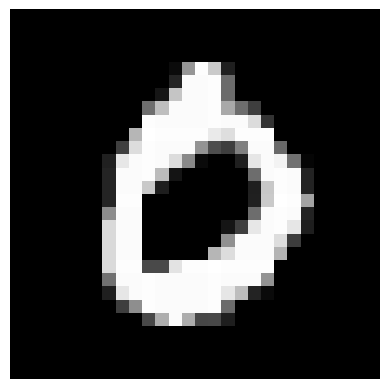

In [ ]:
#model prediction on specific test image
from keras.models import load_model
def f_hat(test_image_index):
    model= load_model('mnist_classification_model.h5')
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
    f = model.predict(np.expand_dims(test_images[test_image_index],axis=0))
    print("Model prediction: "+str(np.argmax(f[0])))
    print("Real Image:")
    show_image(test_image_index)

f_hat(3)